In [2]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

DATA_FILE = 'data/fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1



In [5]:
data.shape

(42, 2)

In [29]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32, name = "X") # no need to specify the shape here
Y = tf.placeholder(tf.float32, name = "Y")
# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(0.0, name = "weights")
b = tf.Variable(0.0, name = "bias")

#init_wb = tf.variables_initializer([w,b], name = "init_wb")
#with tf.Session() as sess:
#    sess.run(init_wb)
# no need to initialize here, just right as 0.0


# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
xw_mul = tf.multiply(X,w) 
Y_predicted = tf.add(xw_mul, b)

# Step 5: use the square error as the loss function
# name your variable loss
sq_loss = tf.square(Y - Y_predicted, name = "loss")

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(sq_loss)


In [32]:
# Phase 2: Train our model
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	# TO - DO	
    sess.run(tf.global_variables_initializer()) # initialize variables here rather than
    # in the defination step
    writer = tf.summary.FileWriter("./graphs/linear_reg", sess.graph)

	# Step 8: train the model
    total_loss = 0
    for i in range(50):   
        # run 100 epochs
        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss. Name the received value as l
            # TO DO: write sess.run()
            _ , l = sess.run([optimizer, sq_loss], feed_dict={X:x, Y:y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    
    writer.close()
    
    w,b = sess.run([w,b])
# plot the results
# X, Y = data.T[0], data.T[1]
# plt.plot(X, Y, 'bo', label='Real data')
# plt.plot(X, X * w + b, 'r', label='Predicted data')
# plt.legend()
# plt.show()

Epoch 0: 2069.6319333978354
Epoch 1: 4186.644291593188
Epoch 2: 6278.9470145950545
Epoch 3: 8347.455060788901
Epoch 4: 10393.046244877063
Epoch 5: 12416.560889687195
Epoch 6: 14418.80565167075
Epoch 7: 16400.553990474396
Epoch 8: 18362.548431600473
Epoch 9: 20305.5004432148
Epoch 10: 22230.093525579272
Epoch 11: 24136.983405642903
Epoch 12: 26026.7998562267
Epoch 13: 27900.14699006824
Epoch 14: 29757.605830128687
Epoch 15: 31599.733704371094
Epoch 16: 33427.06619949105
Epoch 17: 35240.11825746225
Epoch 18: 37039.38434222595
Epoch 19: 38825.34055545594
Epoch 20: 40598.443040766855
Epoch 21: 42359.13217024974
Epoch 22: 44107.83058595789
Epoch 23: 45844.94445399774
Epoch 24: 47570.86532706447
Epoch 25: 49285.96995202237
Epoch 26: 50990.6200474533
Epoch 27: 52685.164760944324
Epoch 28: 54369.93939207909
Epoch 29: 56045.26784304733
Epoch 30: 57711.46138163124
Epoch 31: 59368.81978183967
Epoch 32: 61017.63204769259
Epoch 33: 62658.1761219473
Epoch 34: 64290.720805557525
Epoch 35: 65915.52513

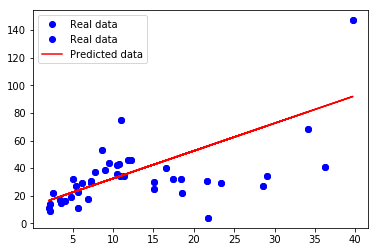

In [33]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [34]:
w

1.9974703

In [35]:
b

12.568723